In [1]:
import numpy as np # çok boyutlu dizilerle ve matrislerle çalışmamıza yardım eden ileri düzey matematiksel işlemler yapabileceğimiz bir kütüphanedir. 
import pandas as pd # pandas, “ilişkisel” ve “etiketli” verilerle çalışmayı kolay ve sezgisel hale getirmek için tasarlanmış hızlı, esnek ve etkileyici veri yapıları sağlayan bir Python paketidir.
import matplotlib.pyplot as plt # grafik görselleştirme kütüphanesi
import seaborn as sbn # grafik görselleştirme kütüphanesi
from sklearn.model_selection import train_test_split # test ve eğitim verisi olarak ikiye ayırmak için kullanılan kütüphane modeli
from sklearn.preprocessing import MinMaxScaler # veriler scaling etmek için kullanılan kütüphane modeli

In [2]:
veriler2 =pd.read_csv("1.Seans.csv")
veriler2

,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
0,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
1,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
2,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
3,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
4,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,32,246444,200,200,1,0,0,1,0,0,...,2.0,7.0,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3973,32,246444,200,200,1,1,0,0,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3974,32,246444,200,200,1,0,0,1,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3975,32,246444,200,200,1,0,0,1,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724


In [3]:
veriler2.describe() #dataFrame serisinin tanımlanması-özellikleri

,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,...,2675.000000,2675.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.0,3977.000000,3977.000000,3977.000000
mean,16.149862,97944.161428,108.382198,114.139552,0.718632,0.014081,0.027408,0.045763,0.019361,0.000754,...,2.457570,7.833271,1.596176,8.705675,71.890536,4.031149,0.0,4.346612,8.372928,0.673257
std,9.007607,62127.362520,83.283085,82.686269,0.449723,0.117840,0.163288,0.208997,0.137809,0.027458,...,1.015573,1.177519,0.544338,3.600398,36.251900,0.667340,0.0,1.795980,2.653632,0.112071
min,1.000000,26640.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,6.000000,1.000000,4.000000,9.000000,3.000000,0.0,2.000000,2.000000,0.500000
25%,8.000000,44795.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.000000,4.100000,32.020000,3.220000,0.0,2.047900,7.120900,0.536800
50%,17.000000,83025.000000,139.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.630000,10.160000,99.990000,4.440000,0.0,5.071500,9.999900,0.742000
75%,23.000000,131694.000000,200.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,9.000000,1.930000,11.480000,99.990000,4.490000,0.0,5.730900,9.999900,0.749800
max,32.000000,246444.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,10.000000,3.120000,15.320000,99.990000,5.220000,0.0,7.646000,9.999900,0.872400


In [4]:
mPCorr = veriler2.corr() #kolerasyon ileşkisi dataFrameVerisi1Corr = dataFrameVerisi1.corr()
#mPCorr.to_excel("mPCorr/1.seans_korelasyon.xlsx")
mPCorr


,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
period,1.000000,0.963767,0.266836,0.235391,0.184503,0.126437,-0.120097,0.015728,-0.027462,0.042252,...,0.109457,0.003308,0.966386,0.971406,0.877272,0.925585,NaN,0.971416,0.781733,0.925336
demand,0.963767,1.000000,0.444704,0.392886,0.288854,0.131792,-0.115387,0.037908,-0.032736,0.051673,...,0.133483,0.031170,0.975355,0.911600,0.730452,0.824143,NaN,0.911642,0.617797,0.823648
marketPrice,0.266836,0.444704,1.000000,0.772703,0.586379,0.055012,-0.068016,-0.022766,-0.020608,0.030229,...,0.058009,0.018632,0.348456,0.204866,-0.069778,0.032174,NaN,0.205206,-0.273884,0.031836
oldMarketPrace,0.235391,0.392886,0.772703,1.000000,0.382155,0.050107,-0.062761,-0.014574,-0.015732,0.028534,...,0.053222,0.022443,0.288568,0.146597,-0.083119,-0.005917,NaN,0.146969,-0.239526,-0.005988
player kazanma,0.184503,0.288854,0.586379,0.382155,1.000000,0.017828,0.026266,-0.036903,-0.050056,0.017192,...,0.079257,0.071544,0.222464,0.135966,-0.039471,0.046197,NaN,0.136147,-0.151963,0.045976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc_Bio,0.925585,0.824143,0.032174,-0.005917,0.046197,0.106488,-0.120956,-0.003605,-0.029614,0.033443,...,0.111323,0.000506,0.902448,0.976770,0.972297,1.000000,NaN,0.976727,0.873841,0.999997
cc_Urn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_Coal,0.971416,0.911642,0.205206,0.146969,0.136147,0.117640,-0.131021,-0.003501,-0.029502,0.039259,...,0.110230,0.000259,0.959711,1.000000,0.933856,0.976727,NaN,1.000000,0.797640,0.976588
cc_Gas,0.781733,0.617797,-0.273884,-0.239526,-0.151963,0.073281,-0.054314,0.029584,-0.023909,0.016848,...,0.076599,-0.021898,0.671668,0.797816,0.908358,0.873841,NaN,0.797640,1.000000,0.874011


In [5]:
# marketPrice üzerinde etkisi olmayanlar dataframe den silinmiştir. 
mPCorr=veriler2.drop(["quant","Player1","Player2","Player3","Player4","Player5","Player6","Player7","Player8","Player9","Player10","Player11","Player12","Player13","Player14","Player15","Player16","Player17","Player18","Player19","Player20","Player21","Player22","Player23","Player24","Player25","Player26","Player27","Player28","Player29","Player30","Player31","Player32","Player33","Player34","Player34","Player35","Player36","Player37","Player38","Player39","pltNum","cc_Urn"] ,axis=1) 
mPCorr1 = mPCorr.corr()["marketPrice"].sort_values()
#mPCorr1.to_excel("mPCorr/4.seans_MP_kolerasyon.xlsx")
mPCorr1

cc_Gas             -0.273884
Geothermal         -0.181278
CCGT               -0.106152
Coal               -0.105788
CO_Emission        -0.089871
fc_Gas             -0.069778
capacityFactor     -0.062895
Hydro              -0.026643
efficiency         -0.020085
Solar              -0.014229
capacity            0.016874
Wind                0.017102
operation_period    0.018632
cc_Bio              0.031836
fc_Bio              0.032174
Nuclear             0.050776
to_build_period     0.058009
Bioenergy           0.062499
investmentCost      0.094313
fc_Coal             0.204866
cc_Coal             0.205206
period              0.266836
fc_Urn              0.348456
player_bid_price    0.428553
demand              0.444704
player kazanma      0.586379
oldMarketPrace      0.772703
marketPrice         1.000000
Name: marketPrice, dtype: float64

C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

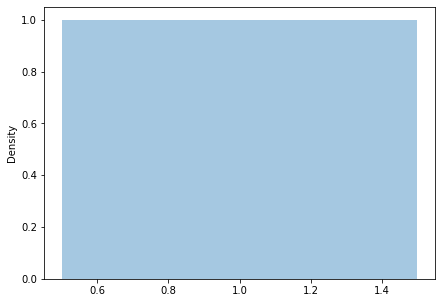

In [6]:
plt.figure(figsize=(7,5))
sbn.distplot(mPCorr1["marketPrice"])

C:\Users\omerp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marketPrice', ylabel='count'>

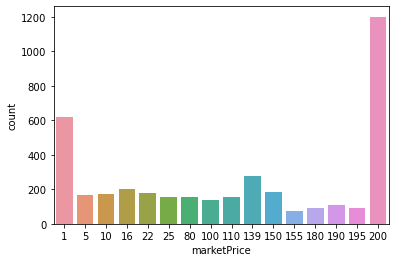

In [7]:
sbn.countplot(veriler2["marketPrice"])

<AxesSubplot:xlabel='period', ylabel='marketPrice'>

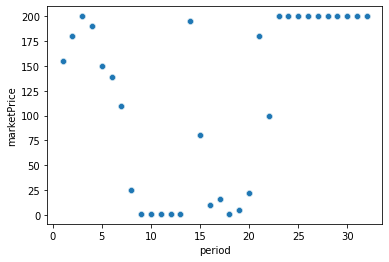

In [8]:
sbn.scatterplot(x="period",y="marketPrice",data=veriler2) 

<AxesSubplot:xlabel='demand', ylabel='marketPrice'>

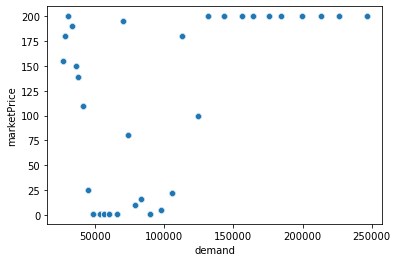

In [9]:
sbn.scatterplot(x="demand",y="marketPrice",data=veriler2) 

In [10]:
veriler2.isnull().sum() # NaN değerlerinin sayısı

period            0
demand            0
marketPrice       0
oldMarketPrace    0
player kazanma    0
                 ..
fc_Bio            0
cc_Urn            0
cc_Coal           0
cc_Gas            0
cc_Bio            0
Length: 70, dtype: int64

In [11]:
mPCorr2 = veriler2.dropna()

In [12]:
mPCorr2.isnull().sum()

period            0
demand            0
marketPrice       0
oldMarketPrace    0
player kazanma    0
                 ..
fc_Bio            0
cc_Urn            0
cc_Coal           0
cc_Gas            0
cc_Bio            0
Length: 70, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
liste = list(mPCorr2.columns)
liste.remove("marketPrice")

In [15]:
""" Not: x değişkeni herkes tarafından bilinen demand, yakıt fiyatları vb. olmalıdır. Fiyat tahmini yapılacak seneryoda 
oyuncuların verdidiği teklikler bilinenler içerisinde olmadığında x parametresine atanmamalıdır.
x bağımsız değişkenleri tek tek girilmelidir. Burada daha önce oluşturulan kolerasyon ve descipe çıktıları incelenerek 
karar verilebilir. Sonuca etkisi olmadığı düşünülen kısımların eklenmemesi tercih edilmelidir.
y = wx + b
y -> label
Modelimizde marketprice fiyatını tahmin etmek için daha fazla değişken kullanmak istiyorsak 
Çoklu Doğrusal Regresyon kullanabiliriz. Çoklu Doğrusal Regresyon, 
Basit Doğrusal Regresyon'a çok benzer, ancak bu yöntem, bir sürekli yanıt (bağımlı) değişken ile 
iki veya daha fazla (bağımsız) değişken arasındaki ilişkiyi açıklamak için kullanılır.
Gerçek dünyadaki regresyon modellerinin çoğu, birden çok öngörücü içerir. 
Yapıyı 10 tane bağımsız değişken kullanarak göstereceğiz, ancak bu sonuçlar herhangi bir tam sayıya genelleştirilebilir:

Y = a + 𝑏1 * X1 + 𝑏2 * X2 + 𝑏3 * X3 + 𝑏4 * X4 + 𝑏5 * X5 + 𝑏6 * X6 + 𝑏7 * X7 + 𝑏8 * X8 + 𝑏9 * X9 + 𝑏10 * X10
"""
y = veriler2["marketPrice"].values
# x -> feature (özellik)
x = veriler2[["oldMarketPrace","player kazanma","demand","player_bid_price","fc_Urn","period","cc_Coal","fc_Coal"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [16]:
x_train.shape

(2664, 8)

In [17]:
x_test.shape

(1313, 8)

In [18]:
y_train.shape

(2664,)

In [19]:
y_test.shape

(1313,)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
# Metric Libraris

from sklearn.metrics import mean_absolute_error         # MAE 
from sklearn.metrics import mean_squared_error          # MSE 
                                                        # RMSE
from sklearn.metrics import mean_squared_log_error      # RMSLE
from sklearn.metrics import r2_score                    # R²  
from sklearn.metrics import mean_poisson_deviance       # MAPE
from sklearn import metrics

In [22]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression

LinearRegression()

In [23]:
X1 = veriler2[['oldMarketPrace']]
Y1 = veriler2['marketPrice']
X2 = veriler2[['player kazanma']]
Y2 = veriler2['marketPrice']
X3 = veriler2[['demand']]   
Y3 = veriler2['marketPrice']
X4 = veriler2[['player_bid_price']]
Y4 = veriler2['marketPrice']
X5 = veriler2[['fc_Urn']]
Y5 = veriler2['marketPrice']
X6 = veriler2[['period']]
Y6 = veriler2['marketPrice']
X7 = veriler2[['cc_Coal']]
Y7 = veriler2['marketPrice']       



In [24]:
linearRegression.fit(X1,Y1)
y_tahmin1 = linearRegression.predict(X1)
linearRegression.fit(X2,Y2)
y_tahmin2 = linearRegression.predict(X2)
linearRegression.fit(X3,Y3)
y_tahmin3 = linearRegression.predict(X3)
linearRegression.fit(X4,Y4)
y_tahmin4 = linearRegression.predict(X4)
linearRegression.fit(X5,Y5)
y_tahmin5 = linearRegression.predict(X5)
linearRegression.fit(X6,Y6)
y_tahmin6 = linearRegression.predict(X6)
linearRegression.fit(X7,Y7)
y_tahmin7 = linearRegression.predict(X7)




In [25]:
tahminDf1 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri1 = pd.Series(y_tahmin1.reshape(3977 ,))
tahminDf2 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri2 = pd.Series(y_tahmin2.reshape(3977 ,))
tahminDf3 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri3 = pd.Series(y_tahmin3.reshape(3977 ,))
tahminDf4 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri4 = pd.Series(y_tahmin4.reshape(3977 ,))
tahminDf5 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri5 = pd.Series(y_tahmin5.reshape(3977 ,))
tahminDf6 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri6 = pd.Series(y_tahmin6.reshape(3977 ,))
tahminDf7 = pd.DataFrame(y_test,columns=["Gerçek Y"])
testTahminleri7 = pd.Series(y_tahmin7.reshape(3977 ,))



In [26]:
tahminDf= pd.concat([tahminDf1,testTahminleri1,tahminDf2,testTahminleri2,tahminDf3,testTahminleri3,tahminDf4,testTahminleri4,
                     tahminDf5,testTahminleri5,tahminDf6,testTahminleri6,tahminDf7,testTahminleri7],axis=1)
tahminDf.columns = ["Gerçek Y", "Tahmin Y1", "Gerçek Y", "Tahmin Y2", "Gerçek Y", "Tahmin Y3", "Gerçek Y", "Tahmin Y4",
                    "Gerçek Y", "Tahmin Y5", "Gerçek Y", "Tahmin Y6", "Gerçek Y", "Tahmin Y7"]
#tahminDf.to_excel("2.seans_gerçek_tahmin.xlsx")
tahminDf

,Gerçek Y,Tahmin Y1,Gerçek Y,Tahmin Y2,Gerçek Y,Tahmin Y3,Gerçek Y,Tahmin Y4,Gerçek Y,Tahmin Y5,Gerçek Y,Tahmin Y6,Gerçek Y,Tahmin Y7
0,80.0,19.549629,80.0,138.935969,80.0,65.875250,80.0,134.531725,80.0,76.598038,80.0,71.005548,80.0,86.052315
1,200.0,19.549629,200.0,138.935969,200.0,65.875250,200.0,141.012345,200.0,76.598038,200.0,71.005548,200.0,86.052315
2,1.0,19.549629,1.0,138.935969,1.0,65.875250,1.0,135.071777,1.0,76.598038,1.0,71.005548,1.0,86.052315
3,1.0,19.549629,1.0,138.935969,1.0,65.875250,1.0,146.952913,1.0,76.598038,1.0,71.005548,1.0,86.052315
4,200.0,19.549629,200.0,138.935969,200.0,65.875250,200.0,118.330175,200.0,76.598038,200.0,71.005548,200.0,86.052315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,NaN,175.205695,NaN,138.935969,NaN,196.908235,NaN,107.529141,NaN,189.622503,NaN,147.486519,NaN,139.778508
3973,NaN,175.205695,NaN,138.935969,NaN,196.908235,NaN,96.728108,NaN,189.622503,NaN,147.486519,NaN,139.778508
3974,NaN,175.205695,NaN,138.935969,NaN,196.908235,NaN,118.330175,NaN,189.622503,NaN,147.486519,NaN,139.778508
3975,NaN,175.205695,NaN,138.935969,NaN,196.908235,NaN,150.733275,NaN,189.622503,NaN,147.486519,NaN,139.778508


In [27]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin1)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin1))

Mean Squared Error_linReg1: 2794.048428659539
RSquared_linReg1: 0.5970700596356964


In [28]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin2)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin2))

Mean Squared Error_linReg1: 4550.0232437873365
RSquared_linReg1: 0.34384079550296753


In [29]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin3)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin3))

Mean Squared Error_linReg1: 5562.983211631662
RSquared_linReg1: 0.19776176006164037


In [30]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin4)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin4))

Mean Squared Error_linReg1: 5660.788537122302
RSquared_linReg1: 0.1836572464952233


In [31]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin5)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin5))

Mean Squared Error_linReg1: 6092.350241467853
RSquared_linReg1: 0.12142169967655403


In [32]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin6)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin6))

Mean Squared Error_linReg1: 6440.594086955396
RSquared_linReg1: 0.07120142773880167


In [33]:
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(Y1, y_tahmin7)) 
print('RSquared_linReg1:', r2_score(Y1, y_tahmin7))

Mean Squared Error_linReg1: 6642.327387927976
RSquared_linReg1: 0.042109452776373235


C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


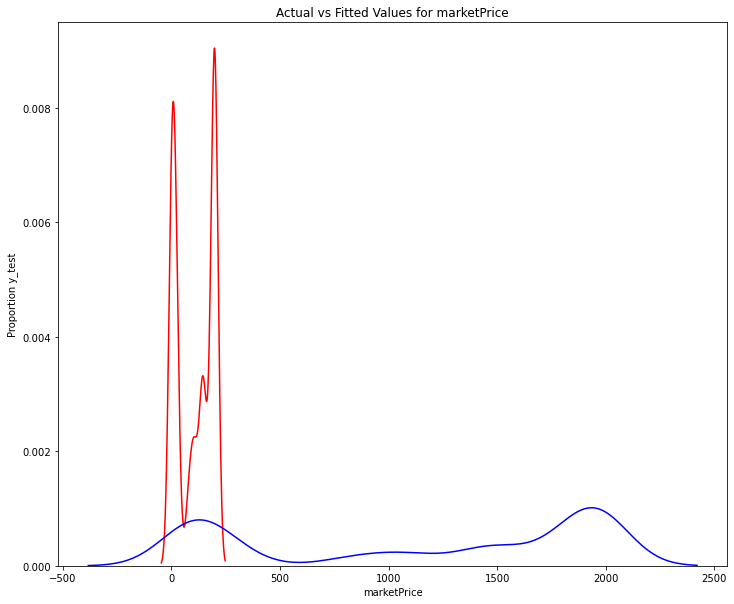

In [34]:
y_tahmin = linearRegression.predict(X1)

width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sbn.distplot(veriler2['marketPrice'], hist=False, color="r", label="Actual Value")
sbn.distplot(y_tahmin, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for marketPrice')
plt.xlabel('marketPrice')
plt.ylabel('Proportion y_test')

plt.show()
plt.close()